# Reconstructing MNIST images using Autoencoder

Now that we have understood how autoencoders reconstruct the inputs, in this section we will learn how autoencoders reconstruct the images of handwritten digits using the MNIST dataset.


In this chapter, we use keras API from the tensorflow for building the models. So that we would be familiarized with how to use high-level APIs.

## Import Libraries

First, let us import the necessary libraries:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

import tensorflow.compat.v1 as tf; tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)

#plotting
import matplotlib.pyplot as plt
%matplotlib inline

#dataset
from tensorflow.keras.datasets import mnist
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


## Prepare the Dataset

Let us load the MNIST dataset. We don't need the labels for autoencoder. Since we are reconstructing the given input we don't need the labels. So, we just load x_train for training and x_test for testing:

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalize the data by dividing with max pixel value which is 255:

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Shape of our dataset:

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


Reshape the images as 2D array:

In [ ]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

Now, the shape of data would become:

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


# Define the Encoder

Now, we define the encoder which takes the images as an input and returns the encodings.

Define the size of the encodings:

In [ ]:
encoding_dim = 32

Define the placeholders for the input:

In [ ]:
input_image = Input(shape=(784,))


Define the encoder which takes the input_image and returns the encodings:

In [ ]:
encoder  = Dense(encoding_dim, activation='relu')(input_image)

# Define the Decoder

Let us define the decoder which takes the encoded values from the encoder and returns the reconstructed image:

In [ ]:
decoder = Dense(784, activation='sigmoid')(encoder)

# Build the model

Now that we defined encoder and decoder, we define the model which takes images as input and returns the output of the decoder which is the reconstructed image:

In [ ]:
model = Model(inputs=input_image, outputs=decoder)

Let us look at summary of the model:

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Compile the model with loss as binary cross entropy and we minimize the loss using AdaDelta optimizer:

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

Now, let us train the model.

Generally, we feed the data to the model as model.fit(x,y) where x is the input and y is the label. But since autoencoders reconstruct its inputs, the input and output to the model should be the same. So we feed the data to the model as model.fit(x_train, x_train)



In [ ]:
model.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2768 - val_loss: 0.1926
Epoch 2/50
60000/60000 [==============================] - 5s 75us/sample - loss: 0.1731 - val_loss: 0.1553
Epoch 3/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1456 - val_loss: 0.1346
Epoch 4/50
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1294 - val_loss: 0.1224
Epoch 5/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1192 - val_loss: 0.1137
Epoch 6/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1119 - val_loss: 0.1075
Epoch 7/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1065 - val_loss: 0.1031
Epoch 8/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1026 - val_loss: 0.0997
Epoch 9/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0998 - val_

## Reconstruct images

Let us see how our model is performing in the test dataset. Feed the test images to the model and get the reconstructed images:

In [ ]:
reconstructed_images = model.predict(x_test)

## Plotting reconstructed images


First let us plot the atcual images i.e input images:

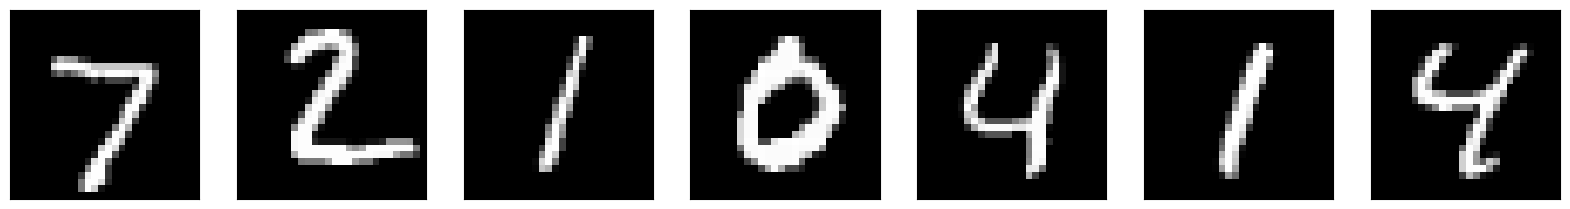

In [ ]:
n = 7
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Plot the reconstructed image:

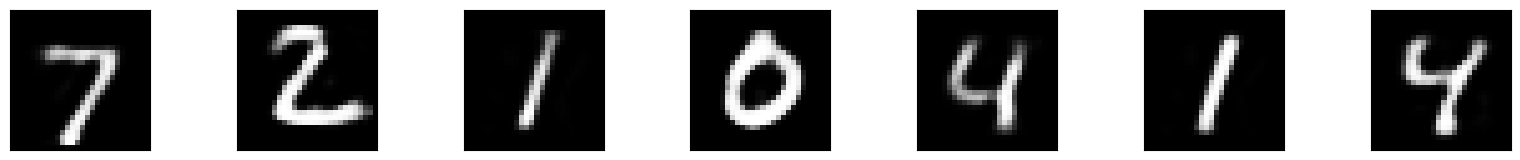

In [ ]:
n = 7
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

As you can notice, autoencoders have learned to reconstruct the given input image. In the next section, we will learn about convolutional autoencoder which uses convolutional layers in the encoder and decoder network.